# Innlevering 6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Oppgave 2 \*


I denne oppgaven skal du benytte stokastisk simulering til å utforske hvordan et residualplott ser ut når modellen som antas i enkel lineær regresjon er korrekt og hvordan residualplott ser ut i noen tilfeller hvor den antatte modellen ikke er korrekt.

Vi skal starte med å anta følgende modell. For $i=1,2,\ldots,n$ la

$y_i = 0.5 + 0.25 x_i + \varepsilon_i$,

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte med forventningsverdi lik null og varians lik $0.25^2$. Her er altså modellen som antas i enkel lineær regresjon korrekt, og parameterverdiene er $\alpha=0.5$, $\beta=0.25$ og $\sigma=0.25$.

I python-koden under har du fått oppgitt verdier for $x_i$ $i=1,2,...,25$. Deretter genereres tilhørende verdier for $y_1,y_2,\ldots,y_n$ ifølge modellen formulert ovenfor. De genererte verdiene visuliseres så i et spredningsplott.


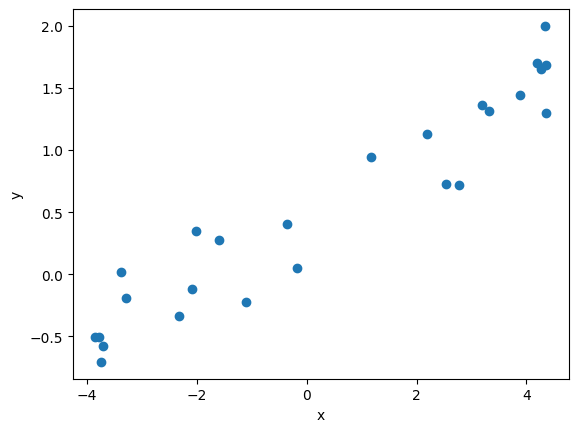

In [2]:
alpha_hat = 0.5
beta_hat = 0.25
sigma = 0.25

x = np.array(
    [
        -3.842,
        -3.784,
        -3.745,
        -3.708,
        -3.37,
        -3.288,
        -2.312,
        -2.078,
        -2.019,
        -1.595,
        -1.106,
        -0.352,
        -0.171,
        1.166,
        2.196,
        2.538,
        2.772,
        3.186,
        3.309,
        3.876,
        4.2,
        4.261,
        4.337,
        4.352,
        4.359,
    ]
)
n = len(x)
y = alpha_hat + beta_hat * x + np.random.normal(0, sigma, n)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Under er det gitt en python-funksjon som tar vektorer $x$ og $y$ som input og regner ut estimatene $\hat{\alpha}$, $\hat{\beta}$ og $S^2$ i en enkel lineær regresjonsmodell. Dette er tilsvarende metode som ble gjort i oppgave 1, bare nå med et konstantledd (SME for lineærregresjon, og forventningsrett estimator for variansen).


In [3]:
def estimer_elr(
    x: np.ndarray, y: np.ndarray
) -> tuple[np.floating, float, float]:
    x_bar = x.mean()
    y_bar = y.mean()
    beta_hat = sum((x - x_bar) * y) / sum((x - x_bar) ** 2)
    alpha_hat = y_bar - beta_hat * x_bar
    s2 = sum((y - (alpha_hat + beta_hat * x)) ** 2) / (len(x) - 2)
    return alpha_hat, beta_hat, s2


alpha_hat, beta_hat, s2 = estimer_elr(x, y)
print(f"{alpha_hat = }")
print(f"{beta_hat = }")
print(f"{s2 = }")

alpha_hat = 0.4627140569092285
beta_hat = 0.2541513293368112
s2 = 0.06647390146562308


### Deloppgave a)

Kjør de to bitene med python-kode gitt over. Betrakt nå de genererte $x$ og $y$-verdiene som observerte verdier, og skriv under python-kode som regner ut de resulterende (estimerte) residualene. Lag også et residualplott hvor du plotter $x_i$-verdiene langs $x$-aksen og de (estimerte) residualene langs $y$-aksen.

Kjør gjerne (alle de tre) pythonkodebitene flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte regresjonsmodellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.


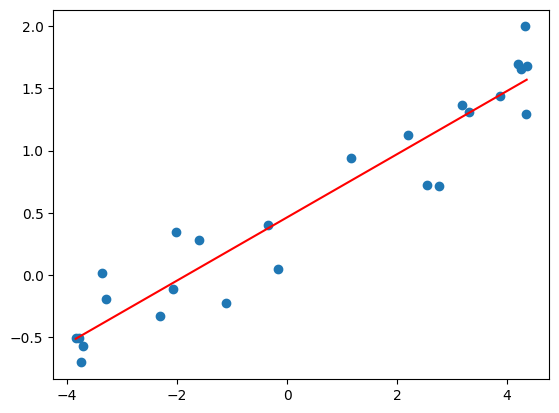

In [4]:
# Her kan du skrive din python-kode
interval = np.array([min(x), max(x)])

plt.scatter(x, y)
plt.plot(interval, alpha_hat + beta_hat * interval, "r")
plt.show()

#### Her er deloppgave a) slutt.

Du skal så utforske hvordan et residualplott kan bli seende ut når modellen som antas i enkel lineær regresjon ikke er korrekt. For å gjøre dette kan du bruke samme $x$-verdier som du brukte i forrige deloppgave. Deretter skal du generere $y$-verdier ifølge

$y_i = 0.5 + 0.25 x_i + 0.02 x_i^2 + \varepsilon_i,$

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte med forventningsverdi null og varians lik $0.10^2$.

### Deloppgave b)

Skriv python-kode som genererer $n=25$ par $(x_i,y_i)$ som beskrevet over. Betrakt så disse simulerte dataene som observerte data og tilpass en enkel lineær regresjonsmodell ved å kalle python-funksjonen estimerELR gitt over. Regn så ut (estimerte) residualer og generer residualplott.

Kjør gjerne python-koden flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte modellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.


In [5]:
# Her kan du skrive din python-kode
alpha = 0.5
beta = 0.25
gamma = 0.02
sigma = 0.10

y = alpha + beta * x + gamma * x**2 + np.random.normal(0, sigma, n)

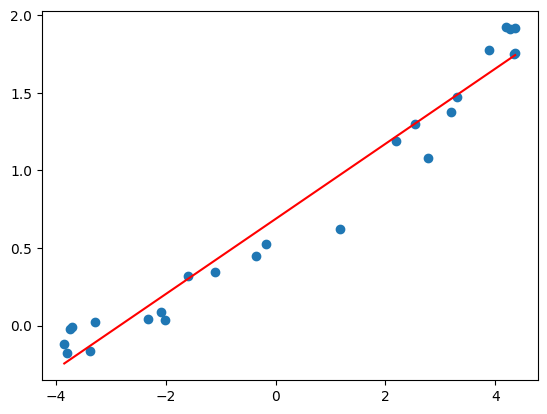

In [6]:
alpha_hat, beta_hat, _ = estimer_elr(x, y)

plt.scatter(x, y)
plt.plot(interval, alpha_hat + beta_hat * interval, "r")
plt.show()

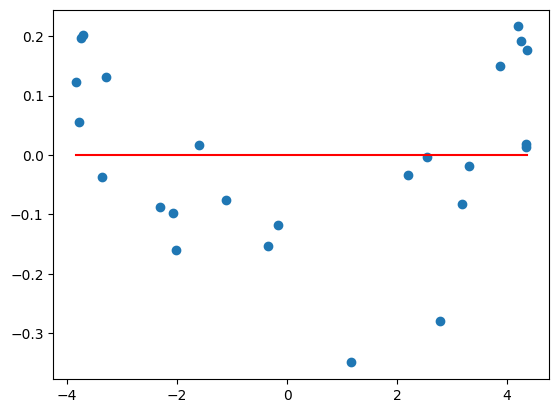

In [7]:
residuals = y - (alpha_hat + beta_hat * x)

plt.scatter(x, residuals)
plt.plot(interval, [0, 0], "r")
plt.show()

#### Her er deloppgave b) slutt.

Du skal så utforske hvordan residualplottet blir seende ut for en annen modell som avviker fra hva som antas i en enkel lineær regresjonsmodell. Bruk samme $x_i$-verdier slik som over. Genererer deretter $y_i$-verdier ifølge

$y_i = 0.5 + 0.25 x_i + \varepsilon_i,$

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og $\varepsilon_i\sim N(0,0.10^2\cdot(0.1+x_i^2))$


### Deloppgave c)

Skriv og kjørpython-kode som simulerer $y$-verdier som beskrevet over, og så bruker disse tilsvarende som i oppgave b) over til å generere tilhørende residualplott.

Kjør gjerne python-koden flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte modellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.


In [8]:
# Her kan du skrive din python-kode
y = (
    alpha
    + beta * x
    + gamma * x**2
    + np.random.normal(0, sigma, n) * (0.1 + x**2)
)

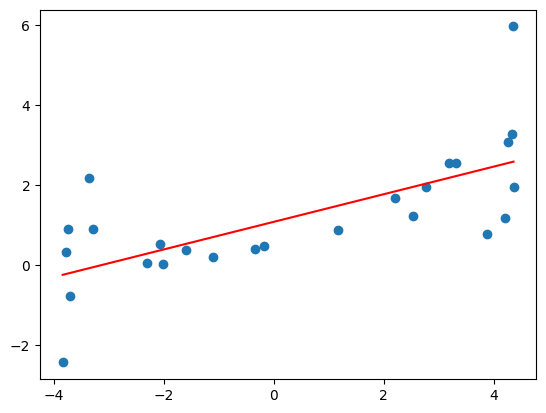

In [9]:
alpha_hat, beta_hat, _ = estimer_elr(x, y)

plt.scatter(x, y)
plt.plot(interval, alpha_hat + beta_hat * interval, "r")
plt.show()

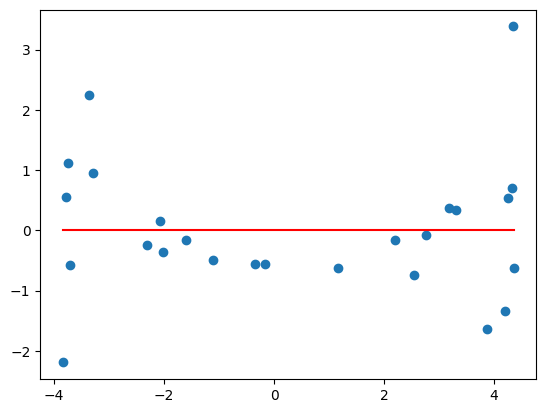

In [10]:
residuals = y - (alpha_hat + beta_hat * x)

plt.scatter(x, residuals)
plt.plot(interval, [0, 0], "r")
plt.show()

## Oppgave 4

I denne oppgaven skal vi tilpasse en enkel lineær regresjonsmodell til et datasett hvor $x_i$-ene er målt tetthet til australsk tømmer, mens tilhørende $y_i$ er målt verdi for den såkalte Janka-hardheten til det samme tømmeret. En grundigere presentasjon og diskusjon av datasettet finnes i 'E.J. Williams. Regression analysis. John Wiley & Sons Inc., New York, 1959; Tabell 3.1, side 43'.

### Deloppgave a) \*


In [11]:
x = np.array(
    [
        24.7,
        24.8,
        27.3,
        28.4,
        28.4,
        29.0,
        30.3,
        32.7,
        35.6,
        38.5,
        38.8,
        39.3,
        39.4,
        39.9,
        40.3,
        40.6,
        40.7,
        40.7,
        42.9,
        45.8,
        46.9,
        48.2,
        51.5,
        51.5,
        53.4,
        56.0,
        56.5,
        57.3,
        57.6,
        59.2,
        59.8,
        66.0,
        67.4,
        68.8,
        69.1,
        69.1,
    ]
)
y = np.array(
    [
        484,
        427,
        413,
        517,
        549,
        648,
        587,
        704,
        979,
        914,
        1070,
        1020,
        1210,
        989,
        1160,
        1010,
        1100,
        1130,
        1270,
        1180,
        1400,
        1760,
        1710,
        2010,
        1880,
        1980,
        1820,
        2020,
        1980,
        2310,
        1940,
        3260,
        2700,
        2890,
        2740,
        3140,
    ]
)

In [12]:
alpha_hat, beta_hat, var_hat = estimer_elr(x, y)

print(f"{alpha_hat = }")
print(f"{beta_hat = }")
print(f"{var_hat = }")

alpha_hat = -1160.4997036594082
beta_hat = 57.5066747641756
var_hat = 33510.77871522938


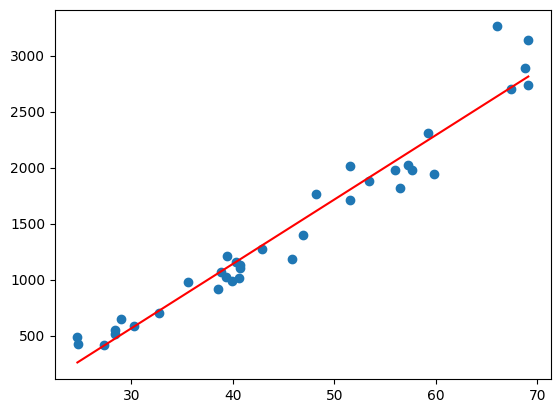

In [13]:
interval = np.array([min(x), max(x)])

plt.scatter(x, y)
plt.plot(interval, alpha_hat + beta_hat * interval, "r")
plt.show()

E(epsilon) = -3.221127068779121e-13 ≈ 0
Var(epsilon) = 31649.068786605527 ≈ 33510.77871522938


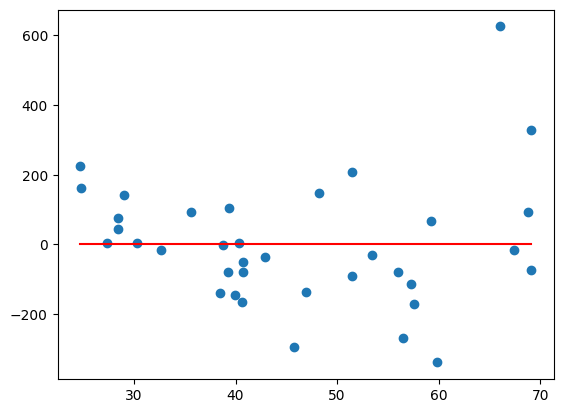

In [14]:
residuals = y - (alpha_hat + beta_hat * x)
print(f"E(epsilon) = {residuals.mean()} ≈ 0")
print(f"Var(epsilon) = {residuals.var()} ≈ {var_hat}")

plt.scatter(x, residuals)
plt.plot(interval, [0, 0], "r")
plt.show()

Visualiser dataene i et spredningsplott.

Anta så en enkel lineær regresjonsmodell for dataene og estimer parametrene $\alpha$, $\beta$ og $\sigma^2$ basert på sannsynlighetsmaksimeringsprinsippet (dvs. regn ut estimater for de tre parametrene). Legg til den estimerte linja $y=\hat{\alpha}+\hat{\beta}x$ i spredningsplottet.

Regn ut de (estimerte) residualene og visualiser disse i et residualplott. Diskuter det du ser i spredningsplottet og i residualplottet. Tyder plottene på at en enkel lineær regresjonsmodell passer for dette datasettet?

#### Her er deloppgave a) slutt.

Uansett hva du konkluderte med i deloppgave a) skal du videre i oppgaven gi svar basert på en enkel lineær regresjonsmodell. Merk dessuten at du i resten av denne oppgaven kan benytte resultater som er utledet i læreboka/introvideoer/forelesninger, men må passe på at forutsetningene for resultatene du benytter er oppfylt.

### Deloppgave b) \*

Benytt datasettet til å gjennomføre en hypotesetest hvor du tester $H_0: \alpha=0$ mot $H_1: \alpha \neq 0$. Dvs. spesifiser hvilken testobservator du vil benytte, angi hvilken sannsynlighetsfordeling testobservatoren har når $H_0$ er sann, finn en beslutningsregel slik at testen får signifikansnivå lik $0.10$, og benytt de observerte data til å bestemme om man skal forkaste $H_0$ eller ikke.


In [15]:
# Her kan du skrive python-kode for å gjøre beregningene du trenger for å besvare oppgaven
x_bar = x.mean()
n = len(x)

s_c = np.sqrt(var_hat * sum(x**2) / (n * sum((x - x_bar) ** 2)))
test_obs = (alpha_hat - 0.0) / s_c
print(f"{test_obs = }")

t_a = stats.t.ppf(1 - 0.1 / 2, n - 2)
bound = t_a * s_c
print(f"KI = ±{bound}")
print(f"Observert verdi = {alpha_hat}")

test_obs = -10.688008138743843
KI = ±183.59988750537028
Observert verdi = -1160.4997036594082


### Deloppgave c)

Du skal så finne et $90\%$-prediksjonsintervall for Janka-hardheten, $Y_0$ i en trestamme hvor tettheten i trestammen er målt til $x=x_0$. Angi svaret som et intervall hvor nedre og øvre grense i intervallet er en funksjon av $x_0$. Plott opp nedre og øvre grense av prediksjonsintervallet sammen med spredningsplottet for $x_0\in [24,70]$.

Det å måle hardheten, altså $x$, i en trestamme kan gjøres raskt, mens det å måle Janka-hardheten, altså $Y$, er en mer arbeidskrevende prosess. Basert på dine resultater i denne oppgaven, vil du si at det er fornuftig erstatte en måling av Janka-hardheten med prediksjonen $y=\hat{\alpha}+\hat{\beta}x$ der $x$ er målt hardhet? Begrunn svaret ditt.


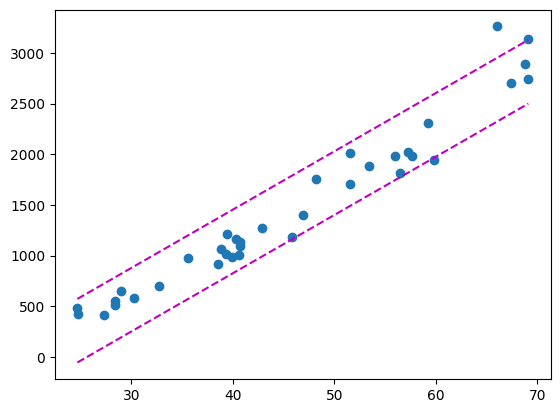

In [16]:
# Her kan du skrive python-kode for å gjøre beregningene du trenger for å besvare oppgaven
s_c = np.sqrt(var_hat * (1 + 1 / n + (x - x_bar) / sum((x - x_bar) ** 2)))
bound = t_a * s_c

plt.scatter(x, y)
plt.plot(x, alpha_hat + beta_hat * x - bound, "m--")
plt.plot(x, alpha_hat + beta_hat * x + bound, "m--")
plt.show()